In [13]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generating random cities

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#From the beginning to the end of the lat and long ranges, we want 1500 values each
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#making lat, long pairs:
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

623

In [4]:
#Performing API Calls
#Fields:
#City, Lat
  #    Lng
   #   Max Temp
    #  Humidity
     # Cloudiness
      #Wind Speed
      #Country
      #Date
    #weather_json["main"]["temp"]

In [34]:
#Open weather information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


#field_names
#empty lists for the fields
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    
    #Get the city's number
    city_no = cities.index(city) + 1
    
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #Put the city's weather into lists
        city_list.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        print(f"Getting {city}\'s weather information(City #{city_no})." )
    except KeyError:
        print(f"Can't find {city} (City #{city_no}) .")

Getting busselton's weather information(City #1).
Getting hermanus's weather information(City #2).
Getting port alfred's weather information(City #3).
Getting linares's weather information(City #4).
Getting pevek's weather information(City #5).
Getting khandyga's weather information(City #6).
Getting cape town's weather information(City #7).
Getting havelock's weather information(City #8).
Getting saint anthony's weather information(City #9).
Getting rikitea's weather information(City #10).
Getting tuktoyaktuk's weather information(City #11).
Getting elizabeth city's weather information(City #12).
Getting nelson bay's weather information(City #13).
Getting tautira's weather information(City #14).
Getting castro's weather information(City #15).
Can't find taolanaro (City #16) .
Can't find nguiu (City #17) .
Getting lebu's weather information(City #18).
Getting sitka's weather information(City #19).
Getting qaanaaq's weather information(City #20).
Getting tasiilaq's weather information(C

Getting alto longa's weather information(City #169).
Getting carlyle's weather information(City #170).
Getting camocim's weather information(City #171).
Getting rundu's weather information(City #172).
Getting camacha's weather information(City #173).
Getting osinki's weather information(City #174).
Getting tshikapa's weather information(City #175).
Getting krasnoselkup's weather information(City #176).
Getting srednekolymsk's weather information(City #177).
Getting nisia floresta's weather information(City #178).
Getting airai's weather information(City #179).
Getting gamba's weather information(City #180).
Getting bethel's weather information(City #181).
Getting touba's weather information(City #182).
Getting allen's weather information(City #183).
Getting nioro's weather information(City #184).
Can't find katha (City #185) .
Getting oranjemund's weather information(City #186).
Getting laguna's weather information(City #187).
Getting bronnoysund's weather information(City #188).
Getti

Getting puerto colombia's weather information(City #333).
Getting brae's weather information(City #334).
Getting padang's weather information(City #335).
Getting nouadhibou's weather information(City #336).
Can't find longlac (City #337) .
Getting plettenberg bay's weather information(City #338).
Getting luba's weather information(City #339).
Getting mount isa's weather information(City #340).
Getting kholtoson's weather information(City #341).
Can't find stoyba (City #342) .
Getting lockhart's weather information(City #343).
Can't find sedelnikovo (City #344) .
Getting cayenne's weather information(City #345).
Getting ambilobe's weather information(City #346).
Getting gobabis's weather information(City #347).
Getting boa esperanca's weather information(City #348).
Getting alice springs's weather information(City #349).
Getting gondanglegi's weather information(City #350).
Getting palmer's weather information(City #351).
Getting kruisfontein's weather information(City #352).
Can't find

Getting gimli's weather information(City #500).
Getting manavgat's weather information(City #501).
Getting khani's weather information(City #502).
Getting parabel's weather information(City #503).
Getting xuddur's weather information(City #504).
Getting sale's weather information(City #505).
Getting gwembe's weather information(City #506).
Getting sinnar's weather information(City #507).
Getting lardos's weather information(City #508).
Getting khargone's weather information(City #509).
Can't find bargal (City #510) .
Getting sao bartolomeu de messines's weather information(City #511).
Getting baruun-urt's weather information(City #512).
Getting raga's weather information(City #513).
Getting rawson's weather information(City #514).
Getting taksimo's weather information(City #515).
Can't find achisay (City #516) .
Getting la cruz's weather information(City #517).
Getting san onofre's weather information(City #518).
Getting aksu's weather information(City #519).
Getting leo's weather info

In [30]:
#Putting city results into a csv
city_dict = {'City': city_list, 'Lat': lat, 'Lng': lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}


In [32]:
zd = zip(*city_dict.values())
#, encoding='utf-8'

with open("output_data/cities.csv", 'w', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',', lineterminator = '\n')
    writer.writerow(city_dict.keys())
    writer.writerows(zd)


In [35]:
#Dataframe of our city data
city_df = pd.read_csv("output_data/cities.csv")
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,59.00,90,0,16.04,AU,1608418814
1,Hermanus,-34.42,19.23,62.01,90,0,1.01,ZA,1608419152
2,Port Alfred,-33.59,26.89,72.00,96,6,3.00,ZA,1608419176
3,Linares,-35.85,-71.60,72.36,33,36,13.02,CL,1608419311
4,Pevek,69.70,170.31,1.26,90,0,6.13,RU,1608419146


In [36]:
#making sure there's no cities where the humidity is over 100
error_df = city_df[city_df["Humidity"] > 100]
error_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#Plotting Temperature(F) vs Latitude:

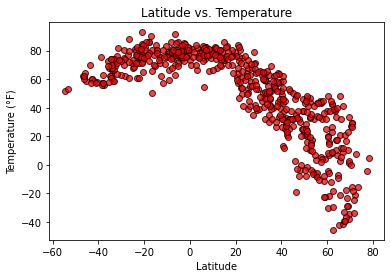

Plotting Temperature(F) vs Latitude: The code here is getting the latitude and Max temperature from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is temperature dependent on latitude?


In [59]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature")
plt.show()
print("Plotting Temperature(F) vs Latitude: The code here is getting the latitude and Max temperature from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is temperature dependent on latitude?")

In [ ]:
#Humidity(%) vs. Latitude


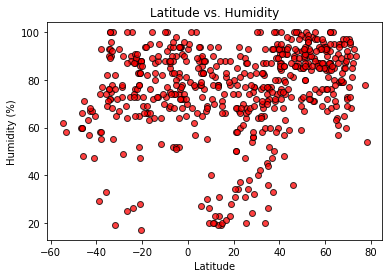

Humidity(%) vs. Latitude: The code here is getting the latitude and percent of humidity from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is humidity dependent on latitude?


In [60]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Humidity")
plt.show()
print("Humidity(%) vs. Latitude: The code here is getting the latitude and percent of humidity from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is humidity dependent on latitude?")

In [ ]:
#Cloudiness(%) vs. Latitude


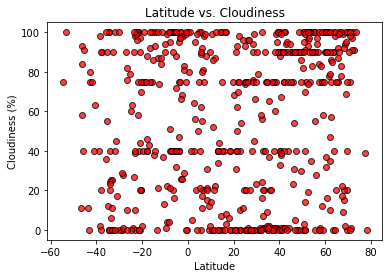

Cloudiness(%) vs. Latitude: The code here is getting the latitude and percent of cloudiness from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is cloudiness dependent on latitude?


In [61]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Cloudiness")
plt.show()
print("Cloudiness(%) vs. Latitude: The code here is getting the latitude and percent of cloudiness from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is cloudiness dependent on latitude?")

In [ ]:
#Wind Speed(mph) vs. Latitude


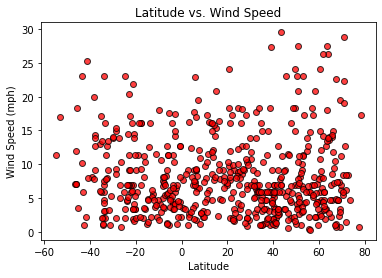

Wind Speed(mph) vs. Latitude: The code here is getting the latitude and wind speed (in mph) from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is wind speed dependent on latitude?


In [62]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Wind Speed")
plt.show()
print("Wind Speed(mph) vs. Latitude: The code here is getting the latitude and wind speed (in mph) from our city dataframe. We are using a scatter plot to compare these two together. We're asking: Is wind speed dependent on latitude?")

In [51]:
#Northern dataframe
north_df = city_df[city_df["Lat"] >= 0]
north_df
#Southern dataframe
south_df = city_df[city_df["Lat"] < 0]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,59.00,90,0,16.04,AU,1608418814
1,Hermanus,-34.42,19.23,62.01,90,0,1.01,ZA,1608419152
2,Port Alfred,-33.59,26.89,72.00,96,6,3.00,ZA,1608419176
3,Linares,-35.85,-71.60,72.36,33,36,13.02,CL,1608419311
6,Cape Town,-33.93,18.42,66.99,72,0,23.04,ZA,1608419145
...,...,...,...,...,...,...,...,...,...
537,Bourail,-21.57,165.48,80.98,52,0,6.08,NC,1608419461
539,Masuguru,-11.37,38.42,75.16,82,100,3.89,TZ,1608419461
550,Vredendal,-31.67,18.50,63.81,76,0,3.20,ZA,1608419463
552,Batemans Bay,-35.72,150.18,69.01,74,100,6.08,AU,1608419463


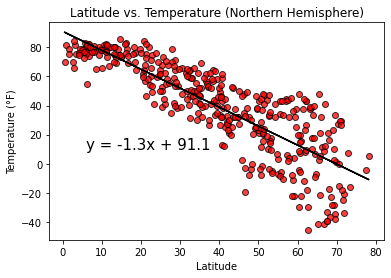

The R-value is -0.8409614361930593.
The R squared value is 0.707216137163893.


In [50]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_df["Lat"], north_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature (Northern Hemisphere)")
plt.show()
print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")

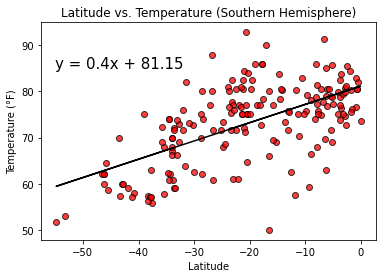

The R-value is 0.6102303588207549.
The R squared value is 0.37238109082650733.
Analyzing Latitude vs. Temperature in the northern and sourthern hemispheres: Temperature is correlated to Latitude in both the northern and southern hemispheres. In the northern hemisphere, there is a strong negative correlation. As the latitude increases, the temperatures go down. The opposite happens in the southern hemisphere where the temperature rises as the latitude goes up. We know that the number for latitude increases in the northern hemisphere as we move away from the equator. The opposite happens for the southern hemisphere. We know that the temperatures are warmer around the equator, so our findings make sense: as you move away from the equator, the temperature goes down. The data is more strongly correlated and closer to the regression line for the Northern Hemisphere. I am suspecting this is in part because there is more land in general and spread out through the Northern Hemisphere than the S

In [63]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_df["Lat"], south_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-55,85),fontsize=15,color="black")
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature (Southern Hemisphere)")
plt.show()
print(f"The R-value is {rvalue}.")
print(f"The R squared value is {rvalue**2}.")
print("Analyzing Latitude vs. Temperature in the northern and sourthern hemispheres: Temperature is correlated to Latitude in both the northern and southern hemispheres. In the northern hemisphere, there is a strong negative correlation. As the latitude increases, the temperatures go down. The opposite happens in the southern hemisphere where the temperature rises as the latitude goes up. We know that the number for latitude increases in the northern hemisphere as we move away from the equator. The opposite happens for the southern hemisphere. We know that the temperatures are warmer around the equator, so our findings make sense: as you move away from the equator, the temperature goes down. The data is more strongly correlated and closer to the regression line for the Northern Hemisphere. I am suspecting this is in part because there is more land in general and spread out through the Northern Hemisphere than the Southern Hemisphere. If we used data regarding temperatures on the globe that are not specifically tied to cities, would the correlation measures be more closely aligned between hemisphere?")